# Proyecto Final 09000160

In [4]:
import seaborn as sns, numpy as np, matplotlib.pyplot as plt, IPython.display as writer
from sklearn.linear_model import LinearRegression

data = np.load('./proyecto_training_data.npy')

split = int(len(data) * .8)

training_set = data[:split]
validation_set = data[split:]

## Análisis Exploratorio

In [140]:
variables = ['Sale Price', 'Quality', 'First Floor Sqr Feet', 'Rooms', 'Year Built', 'Frontage Feet']

mean_list = np.nanmean(training_set, axis=0)
max_list = np.nanmax(training_set, axis=0)
min_list = np.nanmin(training_set, axis=0)
range_list = max_list - min_list # existe una funcion para hacer esto (np.ptp), pero no maneja nan's
std_list = np.nanstd(training_set, axis=0)

column_dataset = training_set.transpose()
column_validation_dataset = validation_set.transpose()

def print_summary(index):
    variable = variables[index]
    
    writer.display(writer.Markdown(f'### {variable}'))
    writer.display(writer.Markdown(f'- Mean: {mean_list[index]}'))
    writer.display(writer.Markdown(f'- Max: {max_list[index]}'))
    writer.display(writer.Markdown(f'- Min: {min_list[index]}'))
    writer.display(writer.Markdown(f'- Range: {range_list[index]}'))
    writer.display(writer.Markdown(f'- Std: {std_list[index]}'))
    
    fig = plt.figure()
    
    x = column_dataset[index]
    y = column_dataset[0]
    nan_filter = ~np.isnan(x)
    
    x = x[nan_filter]
    y = y[nan_filter]
    
    correlation = np.corrcoef(x, y)[1, 0]
    
    ax = fig.add_subplot(2, 1, 1)
    ax.scatter(x, y)
    ax.set_title(f'{variable} (r = {correlation})')
    
    ax = fig.add_subplot(2, 1, 2)
    sns.distplot(x, ax=ax)
    
    plt.show()

### Sale Price

- Mean: 180590.27739726027

- Max: 755000.0

- Min: 34900.0

- Range: 720100.0

- Std: 78781.95108033362

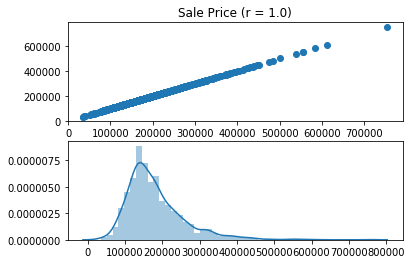

In [141]:
print_summary(0)

### Quality

- Mean: 6.101027397260274

- Max: 10.0

- Min: 1.0

- Range: 9.0

- Std: 1.377435193240741

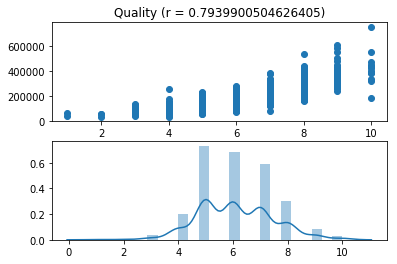

In [142]:
print_summary(1)

### First Floor Sqr Feet

- Mean: 1156.3236301369864

- Max: 3228.0

- Min: 334.0

- Range: 2894.0

- Std: 373.620331503586

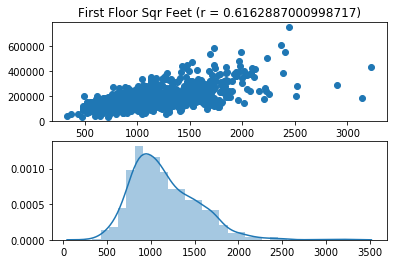

In [143]:
print_summary(2)

### Rooms

- Mean: 6.4854452054794525

- Max: 14.0

- Min: 2.0

- Range: 12.0

- Std: 1.6084517167387253

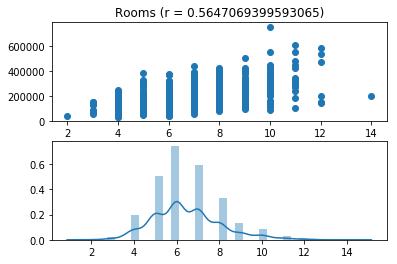

In [144]:
print_summary(3)

### Year Built

- Mean: 1971.451198630137

- Max: 2010.0

- Min: 1875.0

- Range: 135.0

- Std: 29.93888206867768

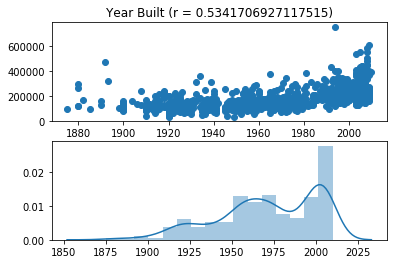

In [145]:
print_summary(4)

### Frontage Feet

- Mean: 69.94698544698545

- Max: 313.0

- Min: 21.0

- Range: 292.0

- Std: 23.4659548199304

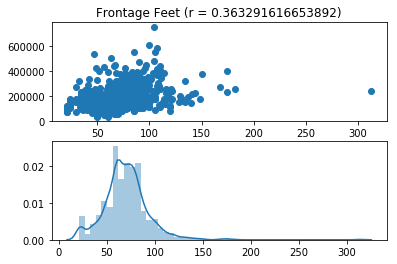

In [146]:
print_summary(5)

Las dos variables a utilizar debido a su alto factor de correlación son:
1. Quality (r = 0.79)
2. First Floor Sqr Feet (r = 0.62)

In [147]:
def compute_error(diff):
    return .5 * np.mean(diff ** 2)

def regression(x, y, epochs = 100, imprimir_error_cada = 10, lr = 0.0001):
    observation_t = np.array([x, np.ones_like(x)])
    observation = np.transpose(observation_t)
    param = np.random.randn(2)
    errors = []
    models = {}
    
    for epoch in range(1, epochs + 1):
        y_hat = np.dot(observation, param)
        diff = y_hat - y
        error = compute_error(diff)
        errors.append(error)
        gradient = np.mean(diff * observation_t, axis=1)
        param = param - lr * gradient
        models[epoch] = {'mb': param, 'x': x, 'y': y, 'y_hat': y_hat}
        
        if (epoch % imprimir_error_cada == 0):
            print(f'{epoch}: {error}')
        
    return models, errors

def plot_error(error):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(np.array(range(len(error))) + 1, error)
    ax.set_title('Error')
    plt.show()

def plot_model(models, n):
    epochs = range(n, len(models) + 1, n)
    fig = plt.figure(figsize=(20, 20))

    for index, epoch in enumerate(epochs):
        model = models[epoch]
        ax = fig.add_subplot((len(epochs) / 2) + 1, 2, index + 1)
        ax.scatter(model['x'], model['y'], color='black')
        ax.plot(model['x'], model['y_hat'])
        ax.set_title(f'Epoch {epoch}')
        
    plt.show()
    
def predict(model_1, model_2, x):
    observation = np.array([x, np.ones_like(x)]).transpose()
    prediction_1 = np.dot(observation, model_1)
    prediction_2 = np.dot(observation, model_2)
    return prediction_1, prediction_2, np.mean(np.array([prediction_1, prediction_2]).transpose(), axis=1)

## Quality

### Error cada 3 iteraciones

3: 1393597249.9482744
6: 1391850471.7514758
9: 1390116062.894115
12: 1388393935.594177
15: 1386684002.8844798


### Evolución del error

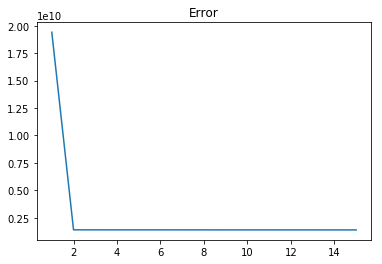

### Evolución del modelo

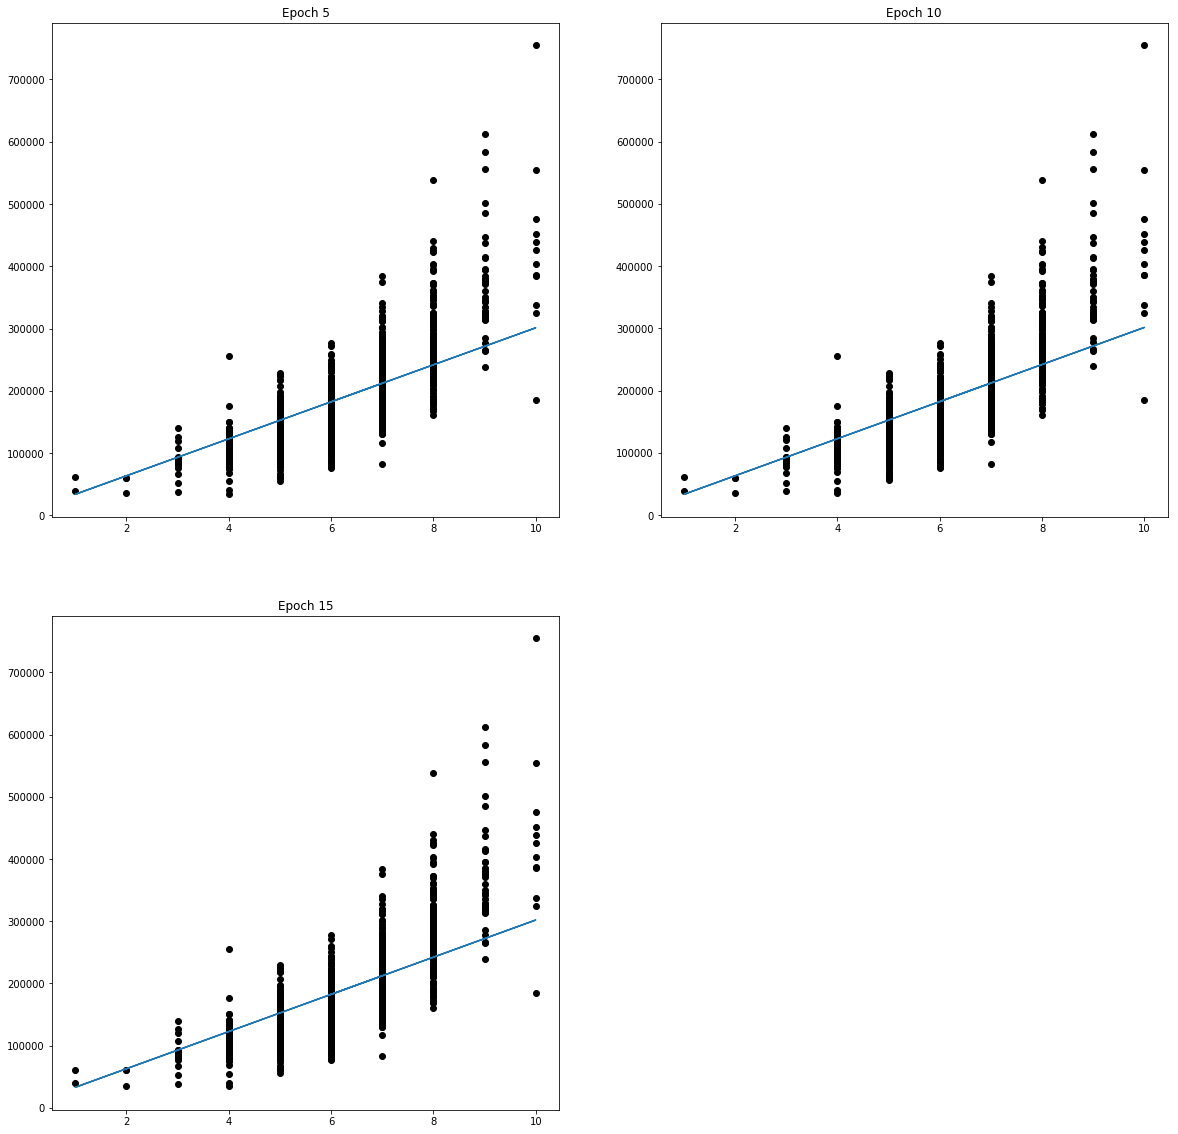

In [148]:
Y = column_dataset[0]
X_quality = column_dataset[1]

writer.display(writer.Markdown(f'## {variables[1]}'))
writer.display(writer.Markdown('### Error cada 3 iteraciones'))
models_quality, errors_quality = regression(X_quality, Y, epochs=15, imprimir_error_cada=3, lr=0.025)
writer.display(writer.Markdown('### Evolución del error'))
plot_error(errors_quality)
writer.display(writer.Markdown('### Evolución del modelo'))
plot_model(models_quality, 5)

scikit_quality = LinearRegression().fit(np.array([X_quality, np.ones_like(X_quality)]).transpose(), Y)

X_validation_quality = column_validation_dataset[1]
prediction_quality, scipy_prediction_quality, avg_prediction_quality = predict(models_quality[15]['mb'], scikit_quality.coef_, X_validation_quality)

## First Floor Sqr Feet

### Error cada 3 iteraciones

3: 2878627847.378501
6: 1978774814.8619
9: 1968218315.3555875
12: 1968094449.18653
15: 1968092971.708221


### Evolución del error

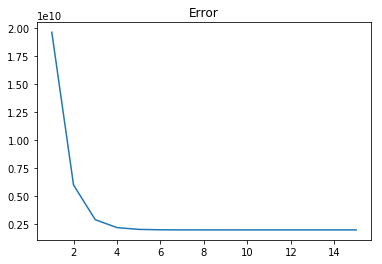

### Evolución del modelo

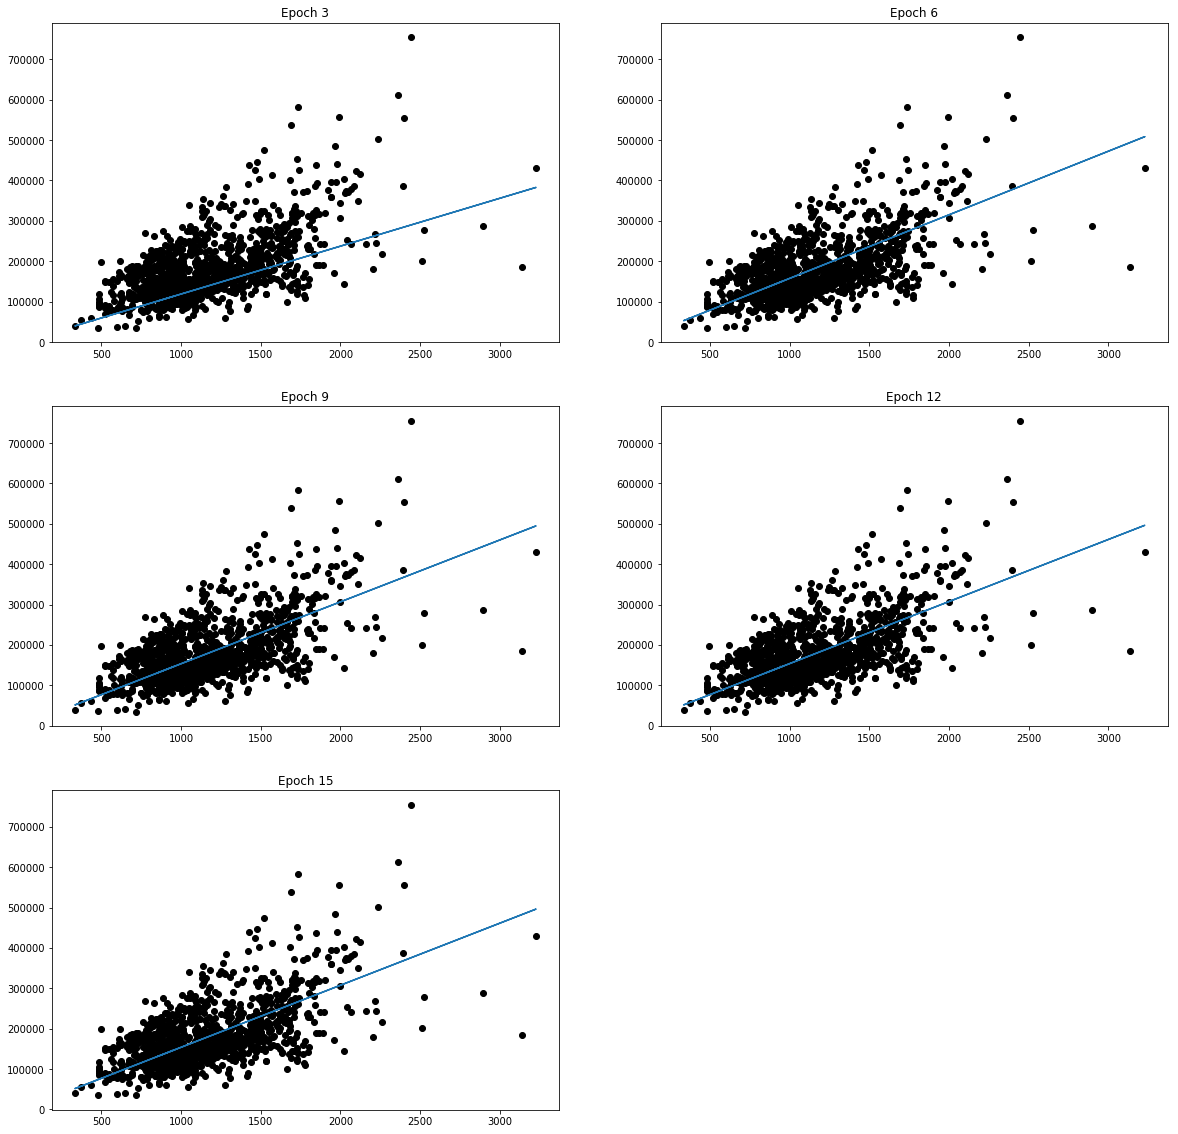

In [149]:
Y = column_dataset[0]
X_sqrft = column_dataset[2]

writer.display(writer.Markdown(f'## {variables[2]}'))
writer.display(writer.Markdown('### Error cada 3 iteraciones'))
models_sqrft, errors_sqrft = regression(X_sqrft, Y, epochs=15, imprimir_error_cada=3, lr=0.000001)
writer.display(writer.Markdown('### Evolución del error'))
plot_error(errors_sqrft)
writer.display(writer.Markdown('### Evolución del modelo'))
plot_model(models_sqrft, 3)

scikit_sqrft = LinearRegression().fit(np.array([X_sqrft, np.ones_like(X_sqrft)]).transpose(), Y)

X_validation_sqrft = column_validation_dataset[2]
manual_prediction_sqrft, scipy_prediction_sqrft, avg_prediction_sqrft = predict(models_sqrft[15]['mb'], scikit_sqrft.coef_, X_validation_sqrft)

## Comparación Quality vs First Floor Square Feet

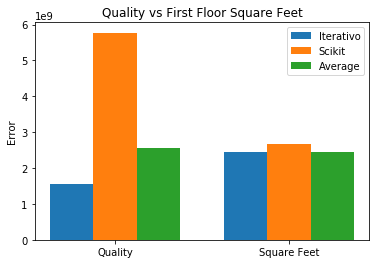

In [150]:
Y_validation = column_validation_dataset[0]

manual_error_quality = compute_error(Y_validation - manual_prediction_quality)
scipy_error_quality = compute_error(Y_validation - scipy_prediction_quality)
avg_error_quality = compute_error(Y_validation - avg_prediction_quality)

manual_error_sqrft = compute_error(Y_validation - manual_prediction_sqrft)
scipy_error_sqrft = compute_error(Y_validation - scipy_prediction_sqrft)
avg_error_sqrft = compute_error(Y_validation - avg_prediction_sqrft)

index = np.arange(2)
bar_width = 0.25

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(index, (manual_error_quality, manual_error_sqrft), bar_width, label="Iterativo")
ax.bar(index + bar_width, (scipy_error_quality, scipy_error_sqrft), bar_width, label="Scikit")
ax.bar(index + 2 * bar_width, (avg_error_quality, avg_error_sqrft), bar_width, label="Average")
ax.set_title('Quality vs First Floor Square Feet')
ax.set_ylabel('Error')
plt.xticks(index + bar_width, ('Quality', 'Square Feet'))
ax.legend()
plt.show()

## Conclusión

El mejor modelo para determinar el precio de casas es el **modelo iterativo sobre la variable `Quality`** porque no solo tiene el menor valor de error en comparación al modelo de scikit y al promedio entre ambos modelos, sino también su coeficiente de correlación es el más alto entre las variables recibidas.